1.6730326074756157


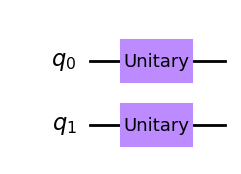

In [1]:
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
from qiskit.circuit import Gate
import numpy as np

C0= (3+np.sqrt(3))/4*np.sqrt(2)
C1= (3-np.sqrt(3))/4*np.sqrt(2)
C2= (1-np.sqrt(3))/4*np.sqrt(2)
C3= (1+np.sqrt(3))/4*np.sqrt(2)

N=[[0,1],[1,0]]

# C0_  = N*C0

print(C0)
matrix2 = (1/2)* np.matrix([[C0/C3,1],
         [1,C1/C2]
         ])

matrix1 = np.matrix([[C3, -C2],
          [C2, C3]
          ]) 
#gate = Gate('fuk',1,matrix2)
gate1 = UnitaryGate(matrix1) 
gate2 = UnitaryGate(matrix2)

circuit1 = QuantumCircuit(2)
circuit1.append(gate2, [0])
circuit1.append(gate1, [1])


circuit1.draw()


1.6730326074756157
1
3
5
7
9
11


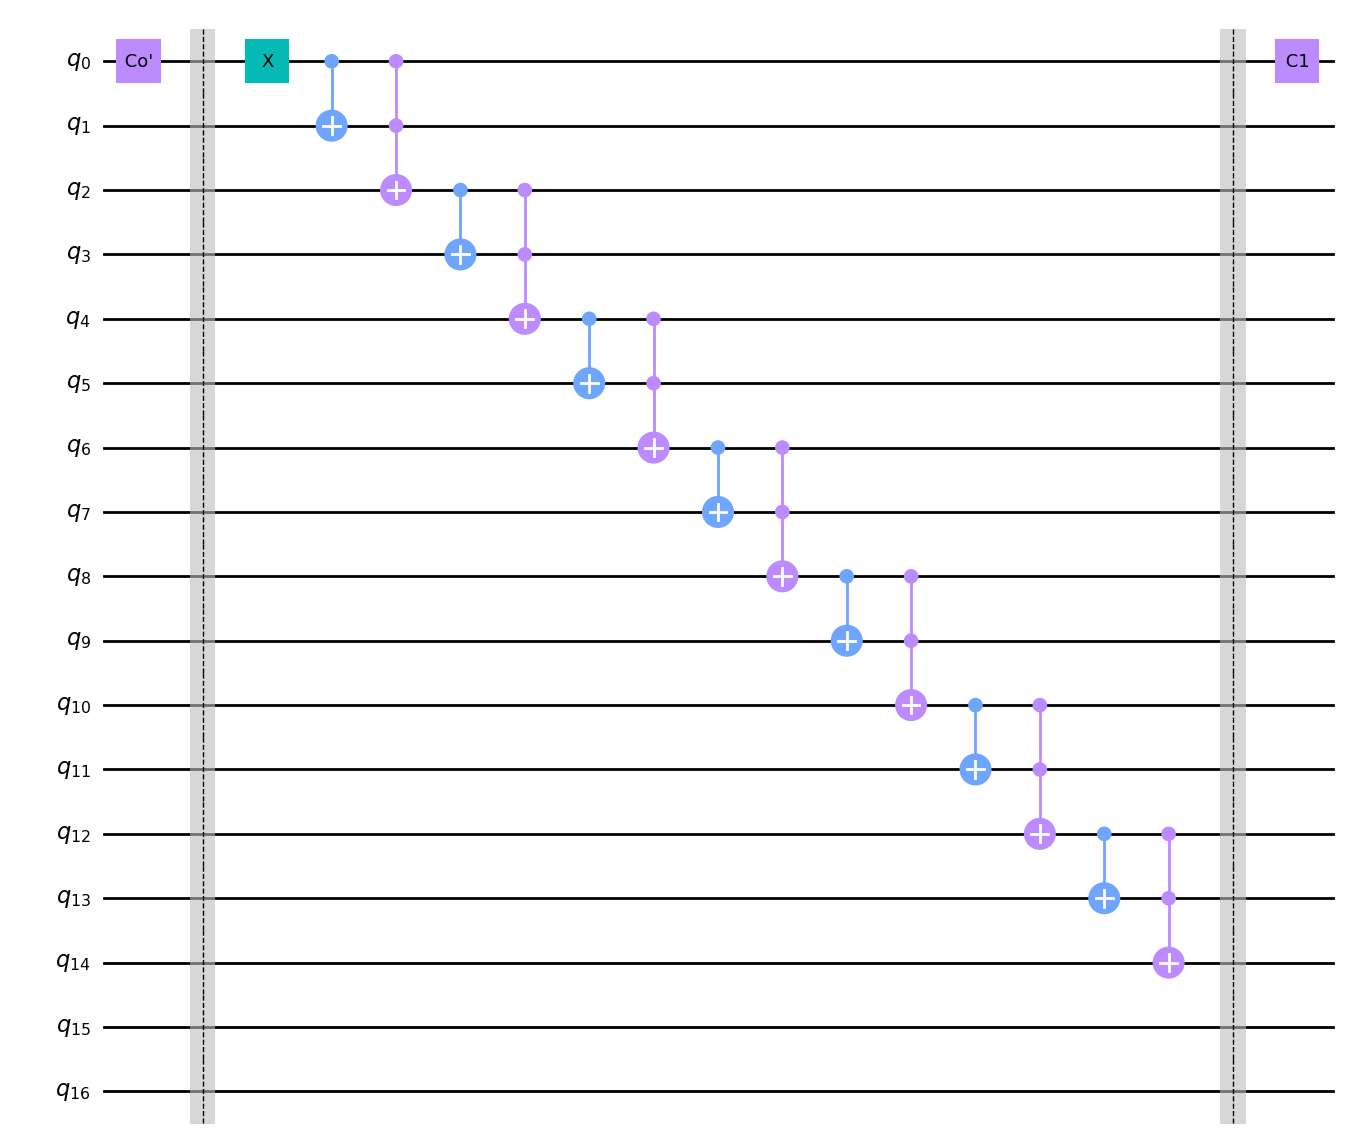

In [29]:
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
from qiskit.circuit import Gate
import numpy as np

C0= (3+np.sqrt(3))/4*np.sqrt(2)
C1= (3-np.sqrt(3))/4*np.sqrt(2)
C2= (1-np.sqrt(3))/4*np.sqrt(2)
C3= (1+np.sqrt(3))/4*np.sqrt(2)

N=[[0,1],[1,0]]

# C0_  = N*C0

print(C0)
matrix2 = (1/2)* np.matrix([[C0/C3,1],
         [1,C1/C2]
         ])

matrix1 = np.matrix([[C3, -C2],
          [C2, C3]
          ]) 
#gate = Gate('fuk',1,matrix2)
gate1 = UnitaryGate(matrix1,label=" Co' ") 
gate2 = UnitaryGate(matrix2,label=" C1 ")

circuit1 = QuantumCircuit(17)
# circuit1.append(gate2, [1])
# circuit2 = QuantumCircuit(7,name='ancillary')
circuit1.append(gate1, [0])
circuit1.barrier()

circuit1.x(0)
circuit1.cx(0,1)
circuit1.ccx(0,1,2)
for i in range(17):
    if (i%2 !=0) & (i+1 <13):
        print(i)
        circuit1.cx(1+i,2+i)
        circuit1.ccx(1+i,2+i,3+i)
circuit1.barrier()
circuit1.append(gate2, [0])

display(circuit1.draw())
# circuit2.draw()

1.6730326074756157
1
3
5
7
9
11


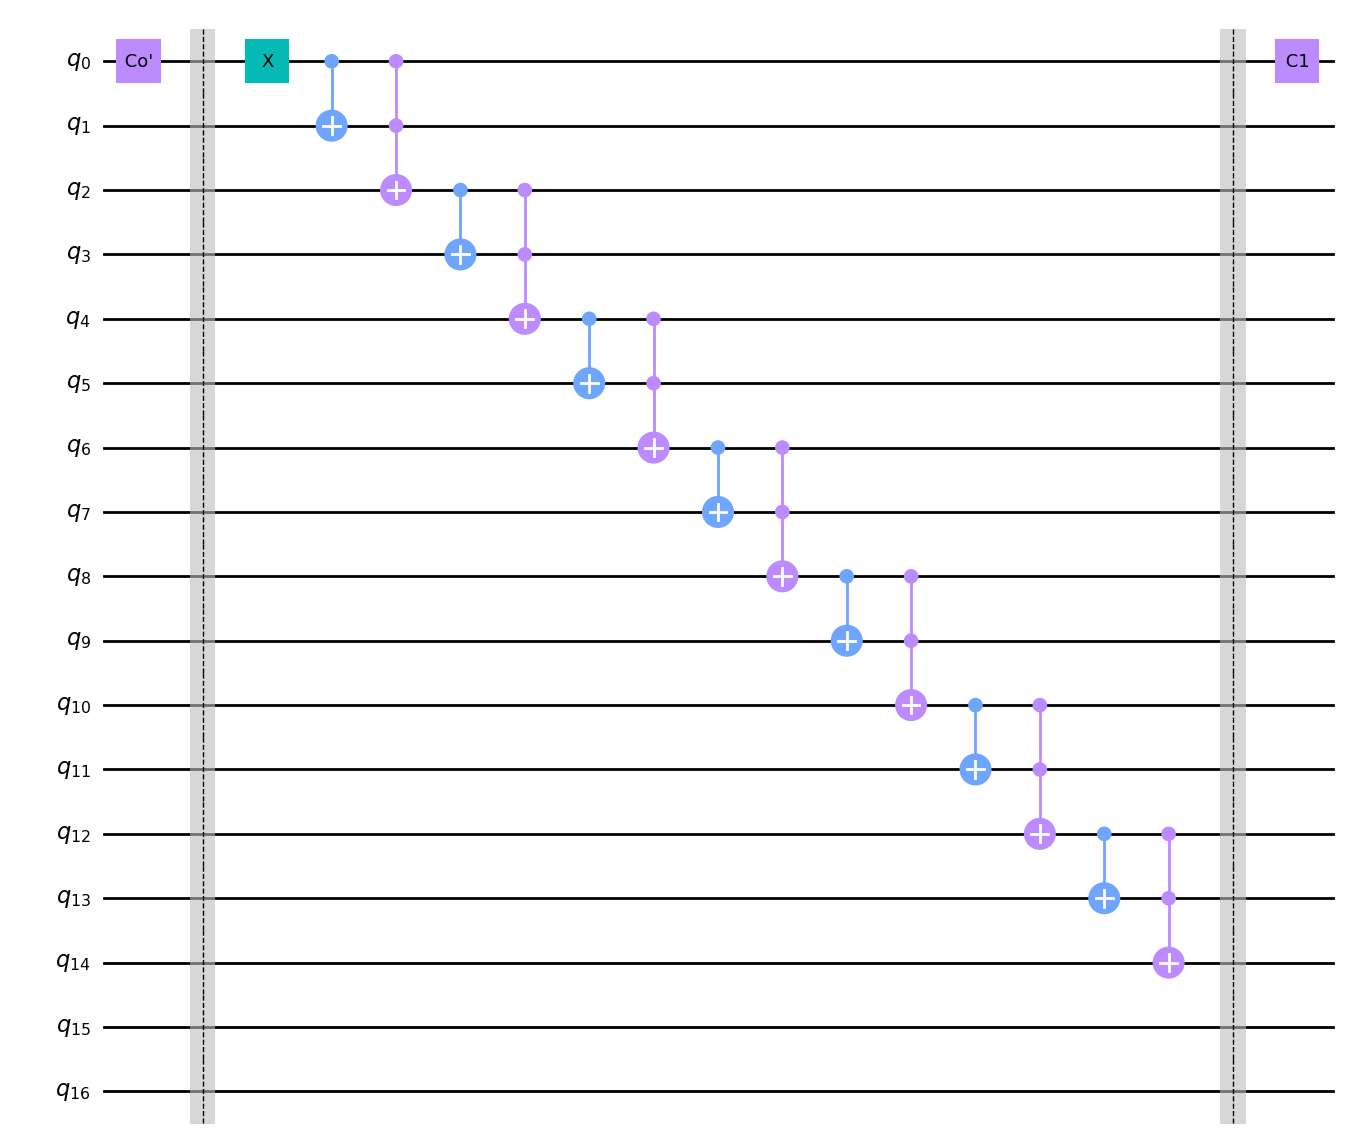

In [2]:
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
from qiskit.circuit import Gate
import numpy as np

C0= (3+np.sqrt(3))/4*np.sqrt(2)
C1= (3-np.sqrt(3))/4*np.sqrt(2)
C2= (1-np.sqrt(3))/4*np.sqrt(2)
C3= (1+np.sqrt(3))/4*np.sqrt(2)

N=[[0,1],[1,0]]

# C0_  = N*C0

print(C0)
matrix2 = (1/2)* np.matrix([[C0/C3,1],
         [1,C1/C2]
         ])

matrix1 = np.matrix([[C2, C3],
                [C3, -C2]
          ]) 
#gate = Gate('fuk',1,matrix2)
gate1 = UnitaryGate(matrix1,label=" Co' ") 
gate2 = UnitaryGate(matrix2,label=" C1 ")

circuit1 = QuantumCircuit(17)
# circuit1.append(gate2, [1])
# circuit2 = QuantumCircuit(7,name='ancillary')
circuit1.append(gate1, [0])
circuit1.barrier()

circuit1.x(0)
circuit1.cx(0,1)
circuit1.ccx(0,1,2)
for i in range(17):
    if (i%2 !=0) & (i+1 <13):
        print(i)
        circuit1.cx(1+i,2+i)
        circuit1.ccx(1+i,2+i,3+i)
circuit1.barrier()
circuit1.append(gate2, [0])
circuit1.measure_all()

display(circuit1.draw())
# circuit2.draw()

1.6730326074756157
1
3
5
7
9
11


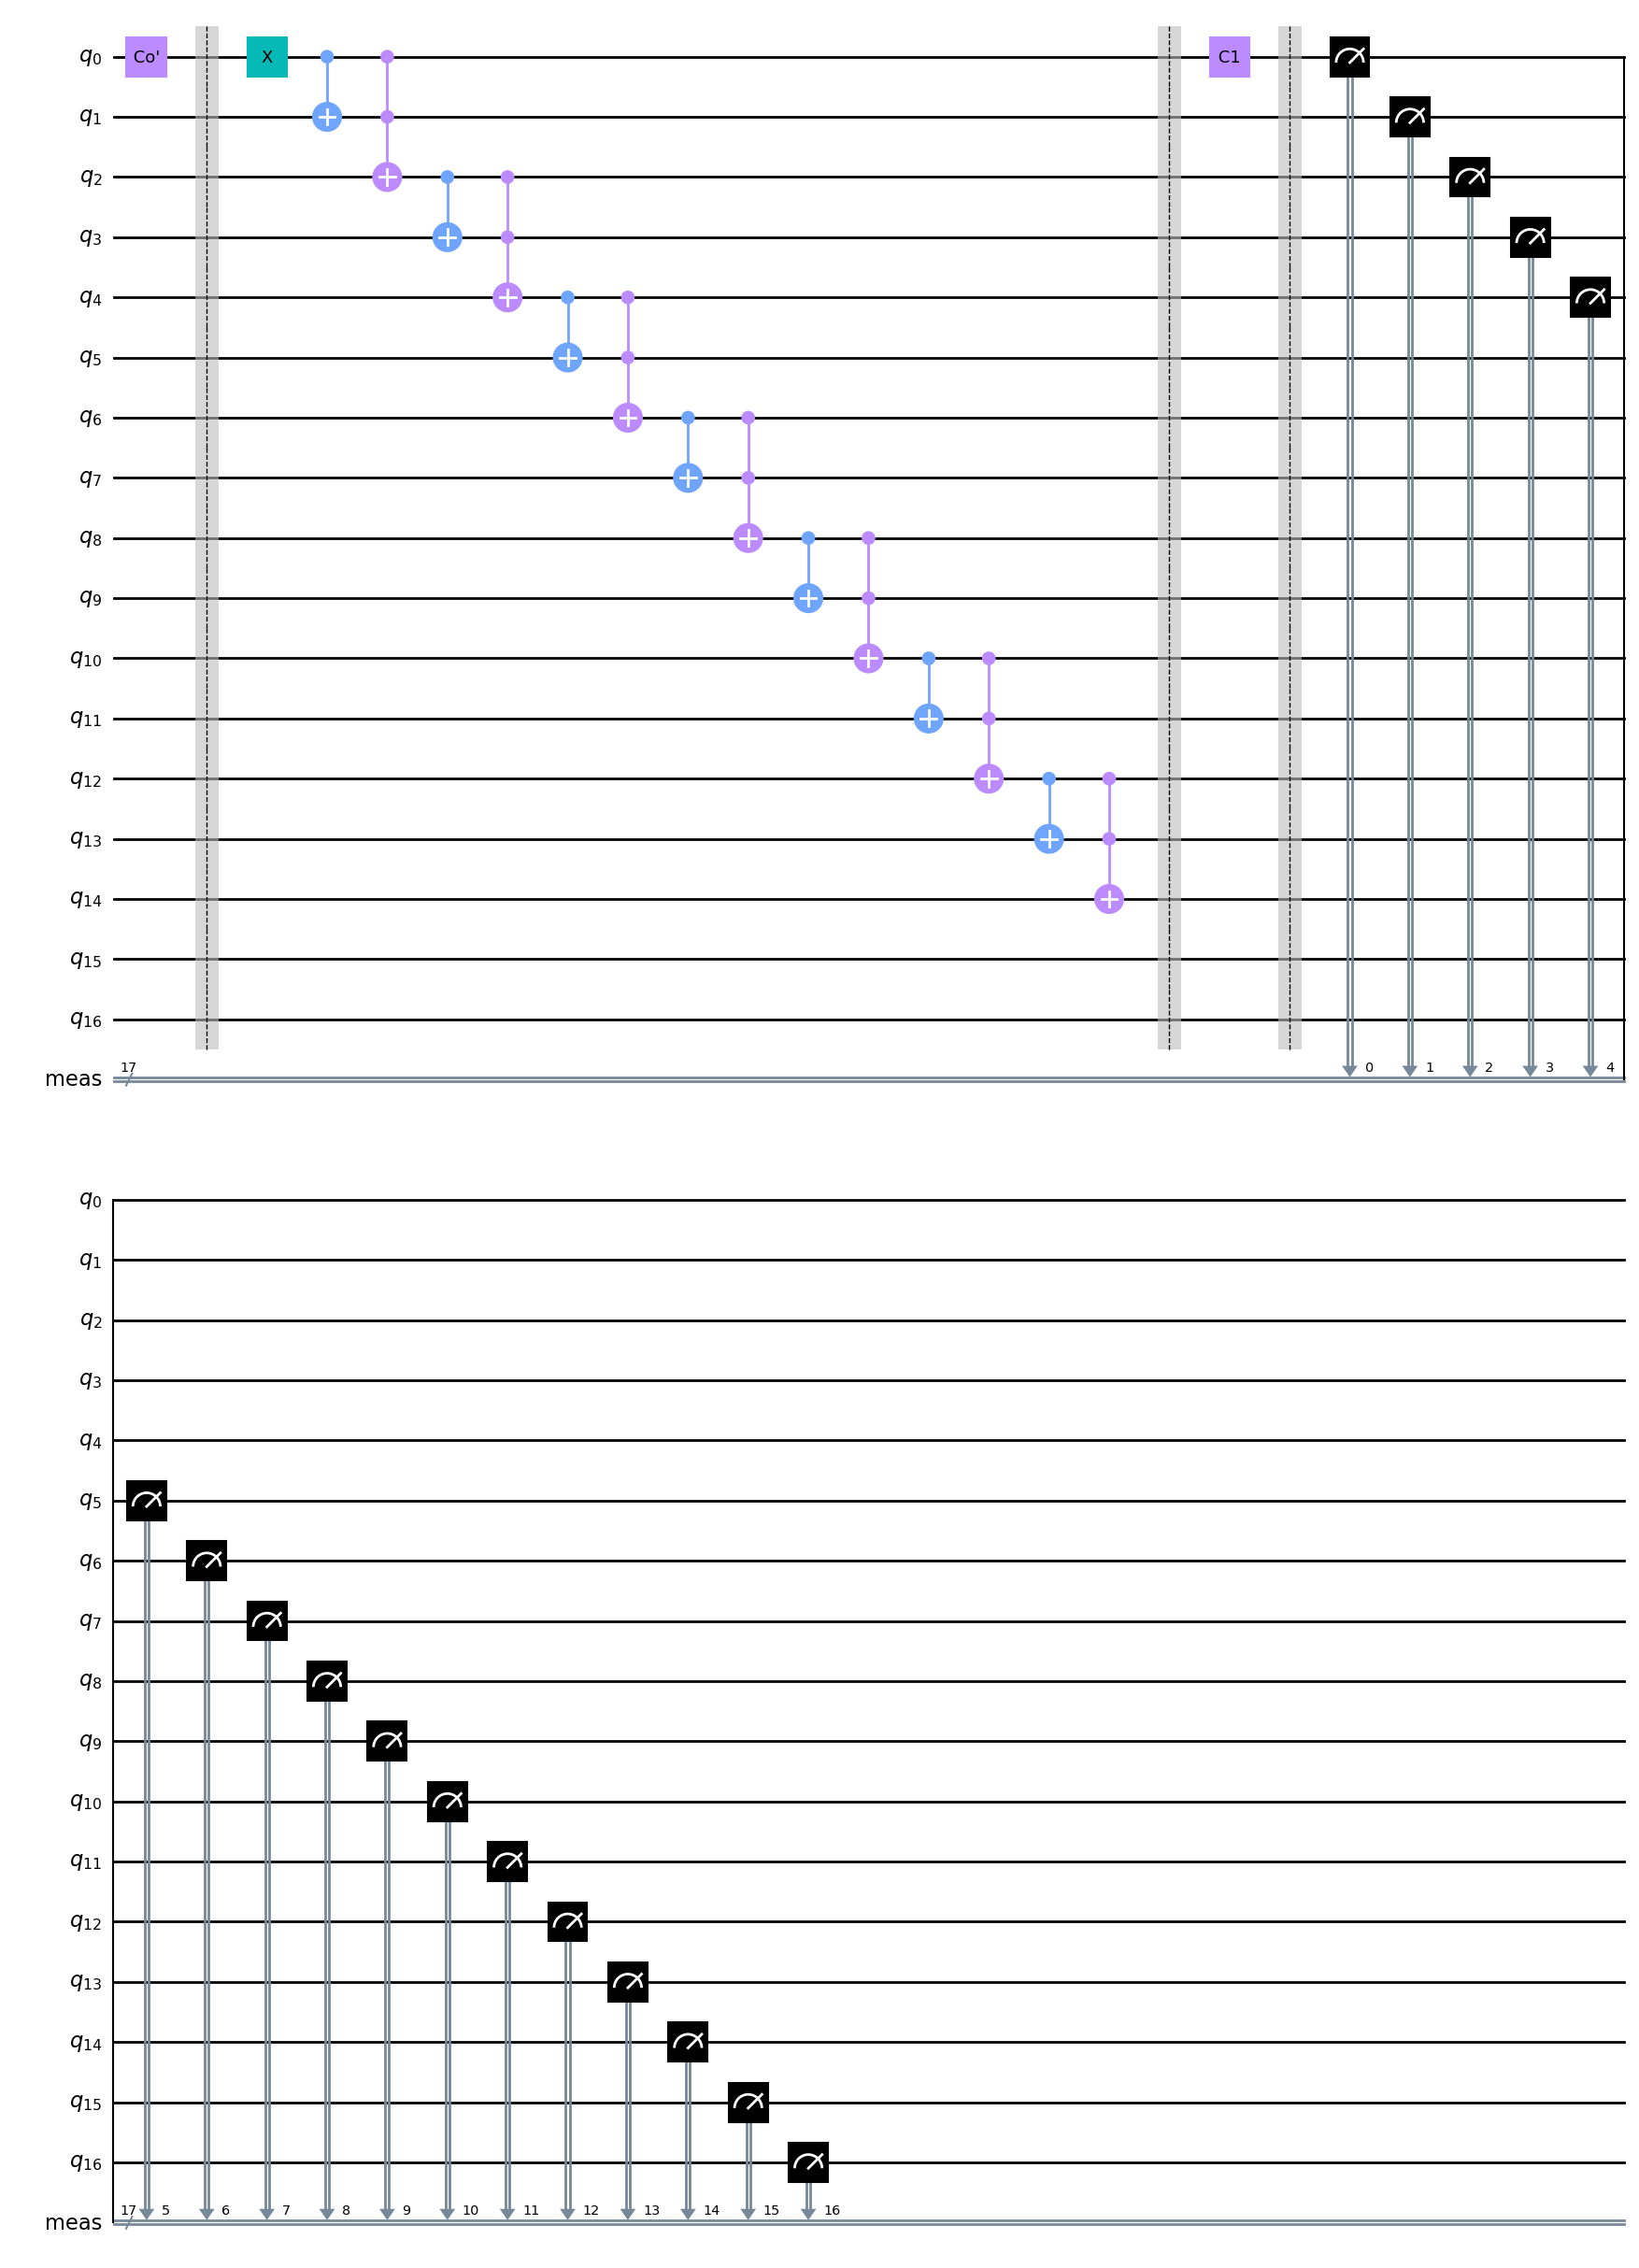

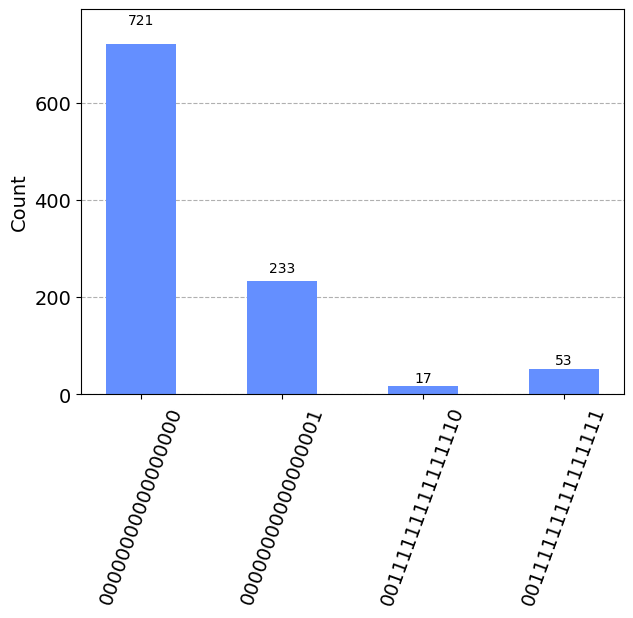

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer,Aer,assemble
from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit.extensions import UnitaryGate
from qiskit.circuit import Gate
import numpy as np

C0= (3+np.sqrt(3))/4*np.sqrt(2)
C1= (3-np.sqrt(3))/4*np.sqrt(2)
C2= (1-np.sqrt(3))/4*np.sqrt(2)
C3= (1+np.sqrt(3))/4*np.sqrt(2)

N=[[0,1],[1,0]]

# C0_  = N*C0

print(C0)
matrix2 = (1/2)* np.matrix([[C0/C3,1],
         [1,C1/C2]
         ])

matrix1 = np.matrix([[C2, C3],
                [C3, -C2]
          ]) 
#gate = Gate('fuk',1,matrix2)
gate1 = UnitaryGate(matrix1,label=" Co' ") 
gate2 = UnitaryGate(matrix2,label=" C1 ")

circuit1 = QuantumCircuit(17)
# circuit1.append(gate2, [1])
# circuit2 = QuantumCircuit(7,name='ancillary')
circuit1.append(gate1, [0])
circuit1.barrier()

circuit1.x(0)
circuit1.cx(0,1)
circuit1.ccx(0,1,2)
for i in range(17):
    if (i%2 !=0) & (i+1 <13):
        print(i)
        circuit1.cx(1+i,2+i)
        circuit1.ccx(1+i,2+i,3+i)
circuit1.barrier()
circuit1.append(gate2, [0])
circuit1.measure_all()

display(circuit1.draw())
# circuit2.draw()



aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(circuit1)
resultQ= job.result()
display(plot_histogram(job.result().get_counts()))


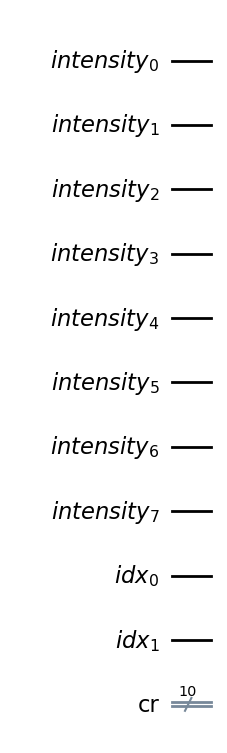

In [15]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

# Initialize the quantum circuit for the image 
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw()




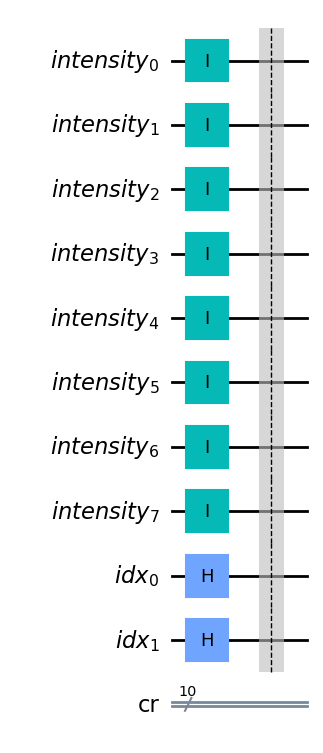

In [16]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.i(idx)

# Add Hadamard gates to the pixel positions    
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw()

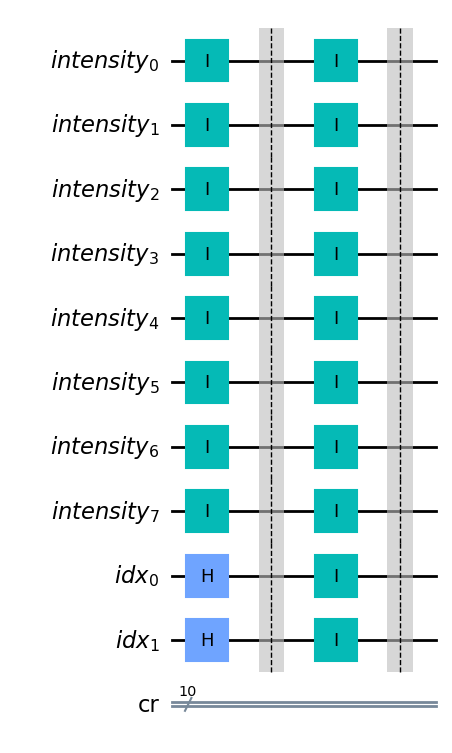

In [17]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()
qc_image.draw()

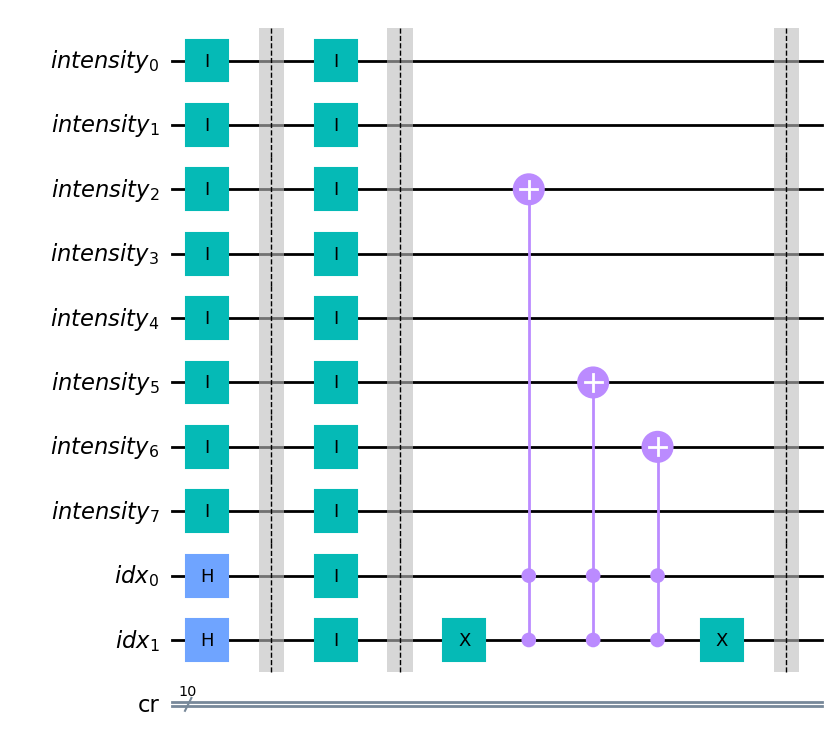

In [18]:
# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()
qc_image.draw()

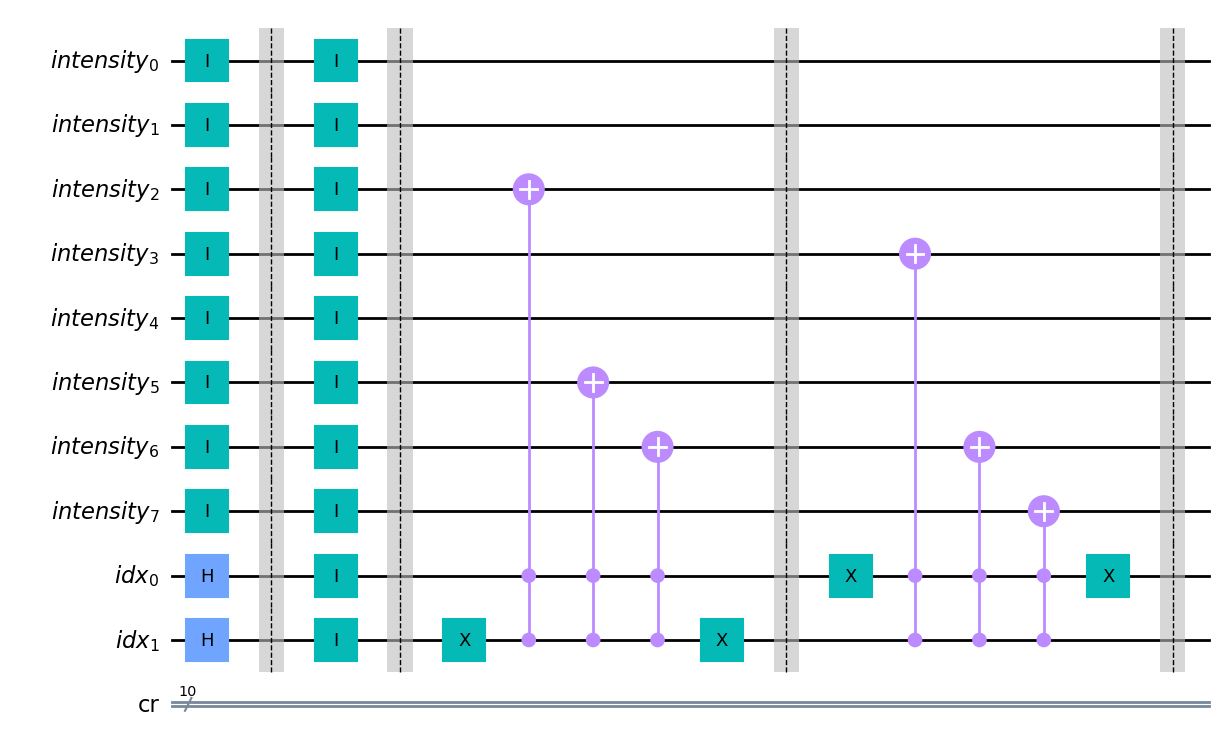

In [19]:
# Encode the third pixel whose value is (11001000):
value10 = '11001000'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw()

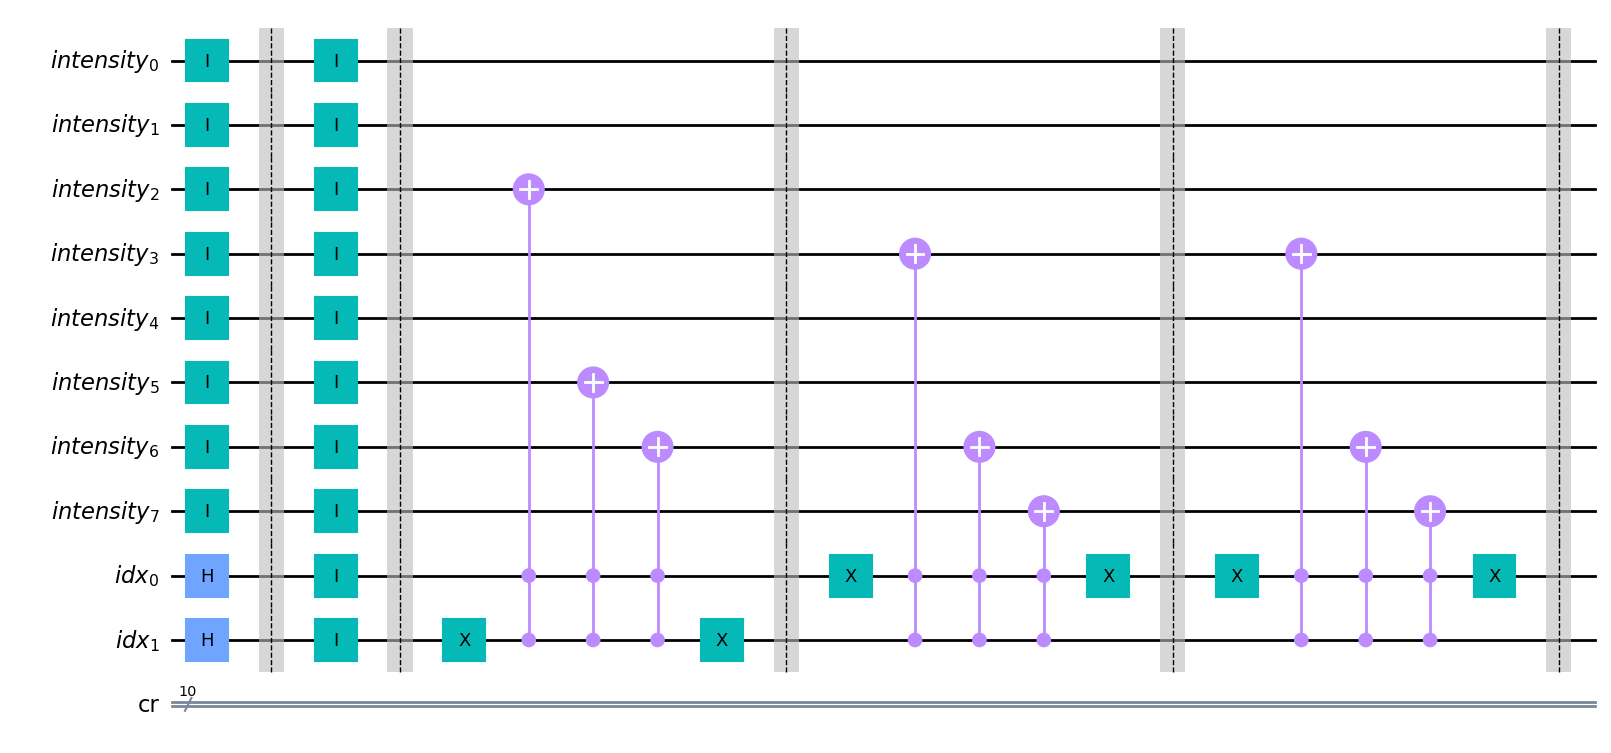

In [20]:
# Encode the third pixel whose value is (11001000):
value10 = '11001000'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw()

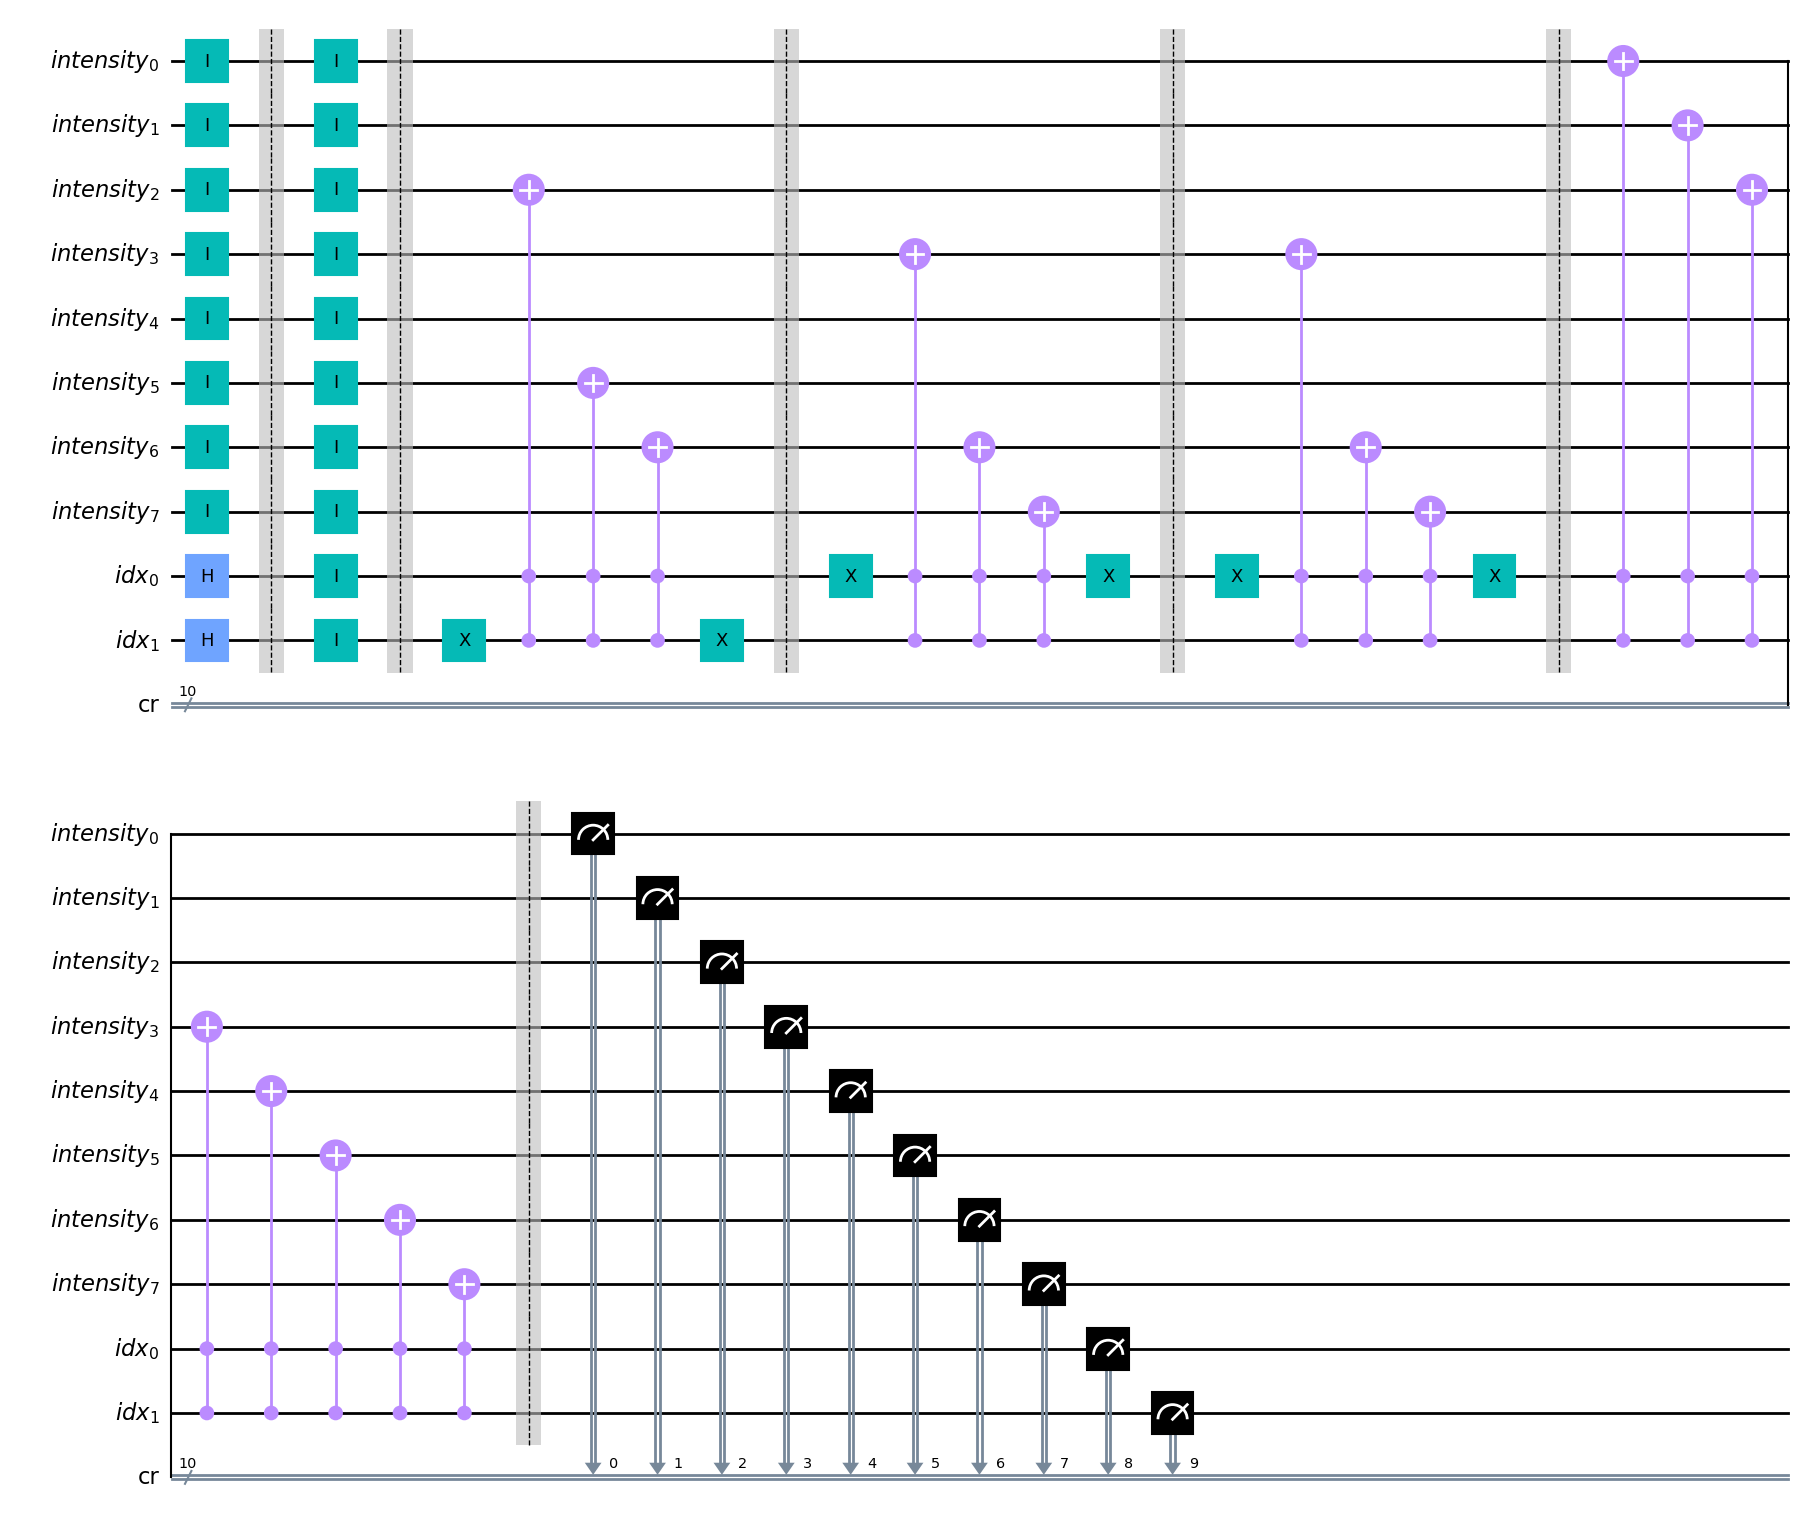

In [21]:
# Encode the third pixel whose value is (11111111):
value11 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value11):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.measure(range(10),range(10))
qc_image.draw()

In [22]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  180
Circuit size:  291


OrderedDict([('cx', 102),
             ('t', 68),
             ('tdg', 51),
             ('h', 34),
             ('id', 18),
             ('measure', 10),
             ('barrier', 6),
             ('u3', 6),
             ('u2', 2)])

/tmp/ipykernel_61/1427501102.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job_neqr = aer_sim.run(qobj)


Encoded: 00 = 0
Encoded: 01 = 01100100
Encoded: 10 = 11001000
Encoded: 11 = 1
{'1000000000': 2098, '0000000000': 2000, '0101100100': 2014, '1111111111': 2080}


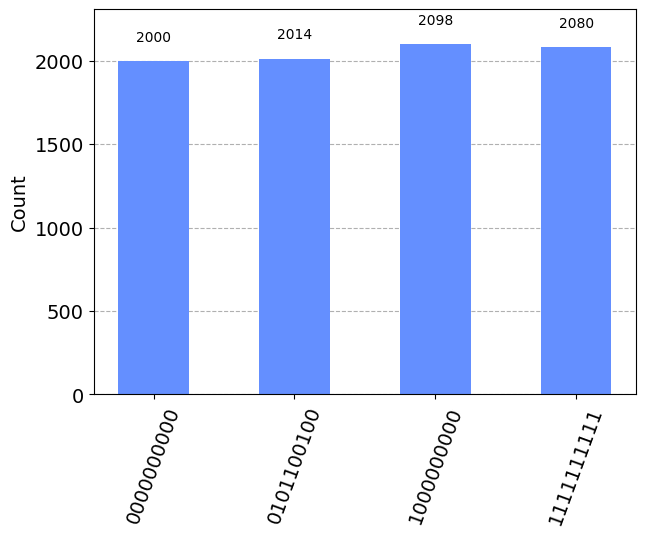

In [23]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
print('Encoded: 00 = 0')
print('Encoded: 01 = 01100100')
print('Encoded: 10 = 11001000')
print('Encoded: 11 = 1')

print(counts_neqr)
plot_histogram(counts_neqr)

In [1]:
from PIL import Image
im = Image.open("cropped.jpg")
pixels = list(im.getdata())
pixels

[(226, 176, 125),
 (248, 195, 177),
 (247, 188, 234),
 (230, 173, 250),
 (87, 40, 118),
 (86, 50, 114),
 (71, 39, 86),
 (208, 185, 205),
 (217, 203, 194),
 (214, 214, 186),
 (206, 231, 192),
 (187, 197, 160),
 (184, 142, 118),
 (148, 94, 84),
 (76, 42, 58),
 (57, 34, 60),
 (248, 196, 183),
 (250, 196, 209),
 (145, 86, 154),
 (102, 44, 128),
 (80, 29, 95),
 (76, 34, 82),
 (59, 27, 64),
 (94, 67, 84),
 (227, 207, 196),
 (228, 217, 185),
 (247, 253, 207),
 (141, 135, 87),
 (190, 144, 110),
 (127, 68, 50),
 (84, 35, 39),
 (81, 39, 53),
 (210, 154, 217),
 (195, 138, 215),
 (77, 18, 126),
 (88, 31, 126),
 (96, 40, 79),
 (119, 71, 85),
 (158, 120, 141),
 (127, 95, 108),
 (222, 188, 176),
 (225, 193, 154),
 (206, 177, 111),
 (154, 117, 46),
 (202, 149, 95),
 (137, 69, 32),
 (169, 90, 73),
 (168, 84, 74),
 (154, 107, 203),
 (90, 42, 142),
 (97, 47, 158),
 (125, 72, 154),
 (188, 131, 150),
 (186, 133, 125),
 (87, 48, 53),
 (94, 60, 61),
 (128, 89, 74),
 (217, 169, 129),
 (223, 163, 91),
 (216, 1

In [29]:
# pixels
im.show()

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpv9cm7fia.PNG'


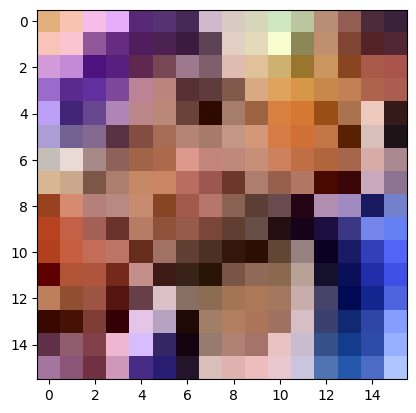

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("cropped.jpg")
plt.imshow(img)
plt.show()

In [2]:
# from PIL import Image
# img = Image.open("cropped.jpg")


# # import matplotlib.pyplot as plt
# # import matplotlib.image as mpimg
# # img = mpimg.imread("cropped.jpg")
# # plt.imshow(img)
# # plt.show()


# r, g, b = img.split()
# k = Image.new("L", img.size, 0)
# just_red = Image.merge("RGB", (r, k, k))
# just_green = Image.merge("RGB", (k, g, k))
# just_blue = Image.merge("RGB", (k, k, b))
# just_red.show()
# just_green.show()
# just_blue.show()


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: /usr/bin/xdg-open: 882: links2: not foundwww-browser: not found

/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpd0dt_6lh.PNG'
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpudquem8e.PNG'
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpca2yz33_.PNG'


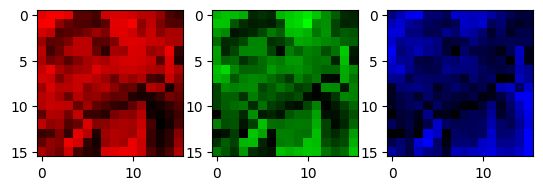

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread("cropped.jpg")
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]
r_mask = np.zeros_like(r)
g_mask = np.zeros_like(g)
b_mask = np.zeros_like(b)
just_red = np.dstack((r, r_mask, r_mask))
just_green = np.dstack((g_mask, g, g_mask))
just_blue = np.dstack((b_mask, b_mask, b))
plt.subplot(131)
plt.imshow(just_red)
plt.subplot(132)
plt.imshow(just_green)
plt.subplot(133)
plt.imshow(just_blue)
plt.show()


In [3]:
from PIL import Image
# im = Image.open("cropped.jpg")
pixels_red = list(just_red.getdata())
pixels_red

Traceback (most recent call last):
  Cell In[3], line 3
    pixels_red = list(just_red.getdata())
AttributeError: 'numpy.ndarray' object has no attribute 'getdata'

Use %tb to get the full traceback.


In [4]:
from PIL import Image
im = Image.open("cropped.jpg")
pixels = list(im.getdata())
pixels

[(226, 176, 125),
 (248, 195, 177),
 (247, 188, 234),
 (230, 173, 250),
 (87, 40, 118),
 (86, 50, 114),
 (71, 39, 86),
 (208, 185, 205),
 (217, 203, 194),
 (214, 214, 186),
 (206, 231, 192),
 (187, 197, 160),
 (184, 142, 118),
 (148, 94, 84),
 (76, 42, 58),
 (57, 34, 60),
 (248, 196, 183),
 (250, 196, 209),
 (145, 86, 154),
 (102, 44, 128),
 (80, 29, 95),
 (76, 34, 82),
 (59, 27, 64),
 (94, 67, 84),
 (227, 207, 196),
 (228, 217, 185),
 (247, 253, 207),
 (141, 135, 87),
 (190, 144, 110),
 (127, 68, 50),
 (84, 35, 39),
 (81, 39, 53),
 (210, 154, 217),
 (195, 138, 215),
 (77, 18, 126),
 (88, 31, 126),
 (96, 40, 79),
 (119, 71, 85),
 (158, 120, 141),
 (127, 95, 108),
 (222, 188, 176),
 (225, 193, 154),
 (206, 177, 111),
 (154, 117, 46),
 (202, 149, 95),
 (137, 69, 32),
 (169, 90, 73),
 (168, 84, 74),
 (154, 107, 203),
 (90, 42, 142),
 (97, 47, 158),
 (125, 72, 154),
 (188, 131, 150),
 (186, 133, 125),
 (87, 48, 53),
 (94, 60, 61),
 (128, 89, 74),
 (217, 169, 129),
 (223, 163, 91),
 (216, 1

In [5]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 2.7 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 23.1.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


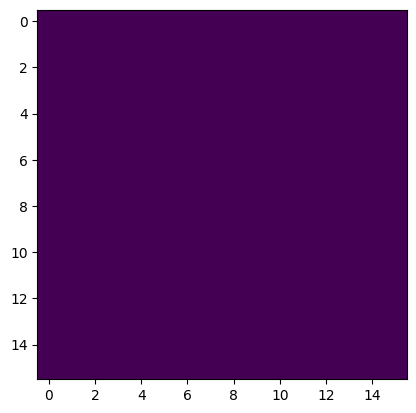

In [10]:
import random 
import cv2 

def add_noise(img): 

	# Getting the dimensions of the image 
	row , col = img.shape 
	
	# Randomly pick some pixels in the 
	# image for coloring them white 
	# Pick a random number between 300 and 10000 
	number_of_pixels = random.randint(300, 10000) 
	for i in range(number_of_pixels): 
		
		# Pick a random y coordinate 
		y_coord=random.randint(0, row - 1) 
		
		# Pick a random x coordinate 
		x_coord=random.randint(0, col - 1) 
		
		# Color that pixel to white 
		img[y_coord][x_coord] = 255
		
	# Randomly pick some pixels in 
	# the image for coloring them black 
	# Pick a random number between 300 and 10000 
	number_of_pixels = random.randint(300 , 10000) 
	for i in range(number_of_pixels): 
		
		# Pick a random y coordinate 
		y_coord=random.randint(0, row - 1) 
		
		# Pick a random x coordinate 
		x_coord=random.randint(0, col - 1) 
		
		# Color that pixel to black 
		img[y_coord][x_coord] = 0
		
	return img 

# salt-and-pepper noise can 
# be applied only to grayscale images 
# Reading the color image in grayscale image 
img = cv2.imread('cropped.jpg', 
				cv2.IMREAD_GRAYSCALE) 

#Storing the image 
cv2.imwrite('salt-and-pepper-lena.jpg', 
			add_noise(img)) 

noise_img = mpimg.imread("salt-and-pepper-lena.jpg")

plt.imshow(noise_img)
plt.show()
